In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dypac import Dypac
from glob import glob
from tqdm import tqdm
from nistats.second_level_model import SecondLevelModel
from nistats.design_matrix import make_second_level_design_matrix
from nistats.reporting import plot_design_matrix, get_clusters_table
from nistats.thresholding import map_threshold
from nistats.regression import OLSModel, SimpleRegressionResults
from nilearn import plotting

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In /home/lussier/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lussier/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lussier/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/lussier/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lussier/.local/lib/python3.6/site-packages/matplotlib/mpl-d

# Load model

In [2]:
path_base = '/home/lussier/Projects/'
r2_path = 'data/r2maps_1000/'

file = open('/home/lussier/Projects/embeddings/bigembedding/Dypac_multistudy_train_sub30clu20sta1000bat6smo5thr02.pickle', 'rb')
model = pickle.load(file)

Comparisons
=============

Dypac 1000 versus Schaefer
=====

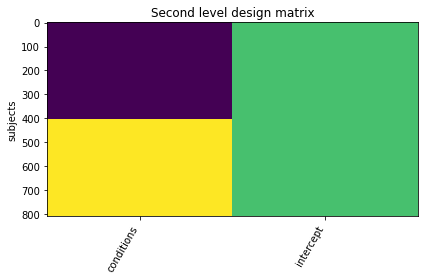

In [3]:
r2maps_schaefer = []
r2_file_schaefer = open((os.path.join(path_base,r2_path, 'schaefer_test.txt')),'r')
for line in r2_file_schaefer:
    r2maps_schaefer.append(os.path.join(path_base,r2_path, (line.strip())))
r2_file_schaefer.close()

behavioral_schaefer = pd.read_csv('/home/lussier/Projects/embeddings/bigembedding/schaefer_test.csv', header = 0, sep=',')

file_id = behavioral_schaefer['FILEID'].values
conditions = behavioral_schaefer['ATLAS_RECODE'].values

confounds = pd.DataFrame({'subject_label': file_id,
                          'conditions': conditions
                         })

design_matrix = make_second_level_design_matrix(file_id, confounds)

ax = plot_design_matrix(design_matrix)
ax.set_title('Second level design matrix', fontsize=12)
ax.set_ylabel('subjects')
plt.tight_layout()
plt.show()

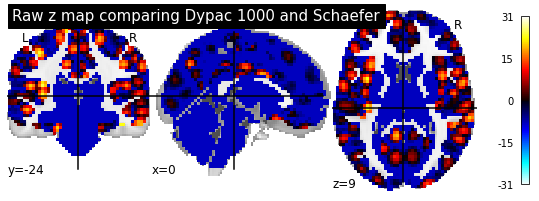

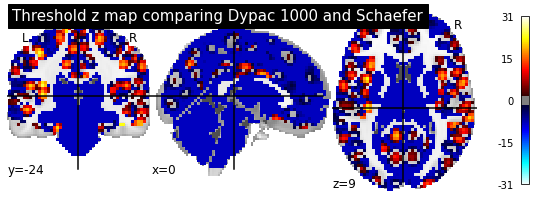

In [4]:
second_level_input = r2maps_schaefer
second_level_model = SecondLevelModel().fit(
        second_level_input, design_matrix=design_matrix)

zmap_schaefer = second_level_model.compute_contrast(
    'conditions', output_type='z_score')
plotting.plot_stat_map(zmap_schaefer, title='Raw z map comparing Dypac 1000 and Schaefer')
plotting.show()

plotting.plot_stat_map(zmap_schaefer, threshold=2, title='Threshold z map comparing Dypac 1000 and Schaefer')
plotting.show()

FDR, p<0.05 threshold: 2.013


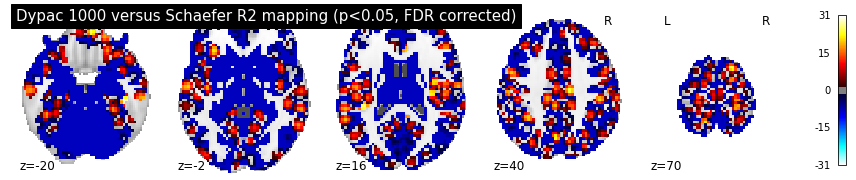

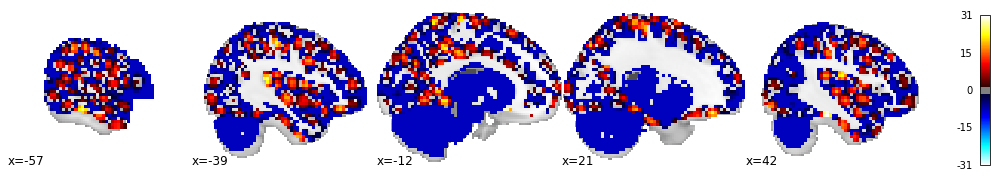

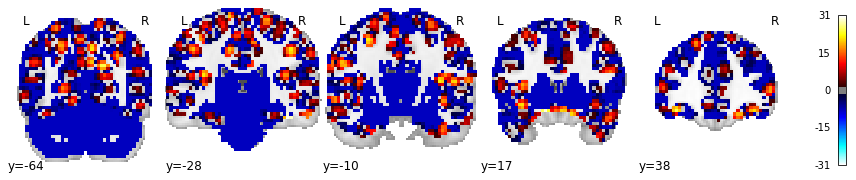

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,42.0,-28.0,-20.0,30.670821,378
1,2,-12.0,17.0,-14.0,29.529108,1782
2,2a,12.0,20.0,-17.0,22.708916,
3,2b,3.0,17.0,-14.0,20.662390,
4,3,6.0,-43.0,19.0,27.926873,26028
...,...,...,...,...,...,...
274,211,-51.0,-34.0,43.0,2.310662,27
275,212,-30.0,-100.0,-5.0,2.252195,27
276,213,12.0,32.0,-20.0,2.211414,27
277,214,18.0,50.0,-14.0,2.107052,27


In [5]:
_, threshold = map_threshold(zmap_schaefer, alpha=.05, height_control='fdr')
print('FDR, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(zmap_schaefer, threshold=threshold, display_mode='z', cut_coords=5,
              title='Dypac 1000 versus Schaefer R2 mapping (p<0.05, FDR corrected)')
plt.show()

plotting.plot_stat_map(zmap_schaefer, threshold=threshold, display_mode='x', cut_coords=5)
plt.show()

plotting.plot_stat_map(zmap_schaefer, threshold=threshold, display_mode='y', cut_coords=5)
plt.show()

get_clusters_table(zmap_schaefer, stat_threshold=threshold, cluster_threshold=None)

Dypac 1000 versus Yeo 17
=====

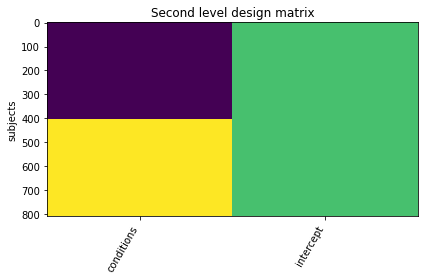

In [6]:
r2maps_yeo = []
r2_file_yeo = open((os.path.join(path_base,r2_path, 'yeo_test.txt')),'r')
for line in r2_file_yeo:
    r2maps_yeo.append(os.path.join(path_base,r2_path, (line.strip())))
r2_file_yeo.close()

behavioral_yeo = pd.read_csv('/home/lussier/Projects/embeddings/bigembedding/yeo_test.csv', header = 0, sep=',')

file_id = behavioral_yeo['FILEID'].values
conditions = behavioral_yeo['ATLAS_RECODE'].values

confounds = pd.DataFrame({'subject_label': file_id,
                          'conditions': conditions
                         })

design_matrix = make_second_level_design_matrix(file_id, confounds)

ax = plot_design_matrix(design_matrix)
ax.set_title('Second level design matrix', fontsize=12)
ax.set_ylabel('subjects')
plt.tight_layout()
plt.show()

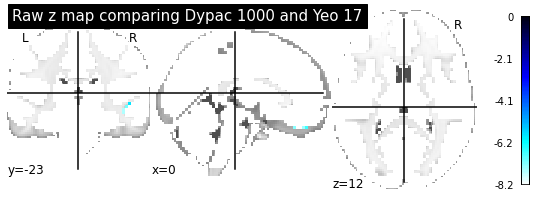

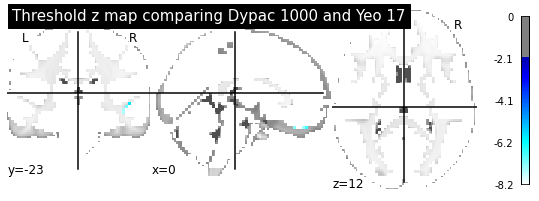

In [7]:
second_level_input = r2maps_yeo
second_level_model = SecondLevelModel().fit(
        second_level_input, design_matrix=design_matrix)

zmap_yeo = second_level_model.compute_contrast(
    'conditions', output_type='z_score')
plotting.plot_stat_map(zmap_yeo, title='Raw z map comparing Dypac 1000 and Yeo 17')
plotting.show()

plotting.plot_stat_map(zmap_yeo, threshold=2, title='Threshold z map comparing Dypac 1000 and Yeo 17')
plotting.show()

FDR, p<0.05 threshold: 2.941


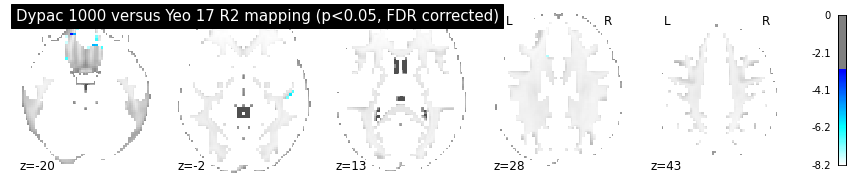

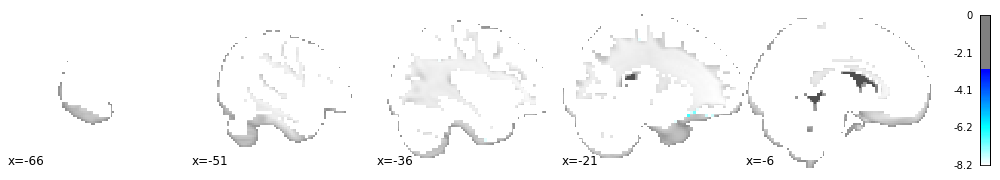

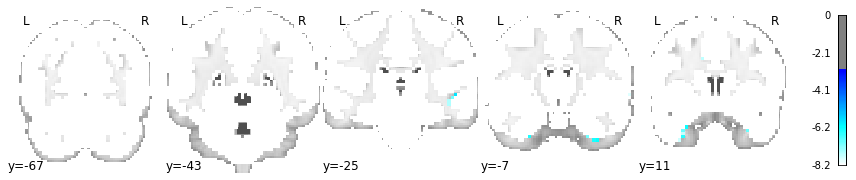

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)


In [8]:
_, threshold = map_threshold(zmap_yeo, alpha=.05, height_control='fdr')
print('FDR, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(zmap_yeo, threshold=threshold, display_mode='z', cut_coords=5,
              title='Dypac 1000 versus Yeo 17 R2 mapping (p<0.05, FDR corrected)')
plt.show()

plotting.plot_stat_map(zmap_yeo, threshold=threshold, display_mode='x', cut_coords=5)
plt.show()

plotting.plot_stat_map(zmap_yeo, threshold=threshold, display_mode='y', cut_coords=5)
plt.show()

get_clusters_table(zmap_yeo, stat_threshold=threshold, cluster_threshold=None)

Dypac 1000 versus MIST 444
=====

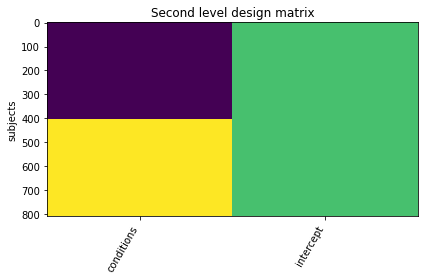

In [9]:
r2maps_mist = []
r2_file_mist = open((os.path.join(path_base,r2_path, 'mist_test.txt')),'r')
for line in r2_file_mist:
    r2maps_mist.append(os.path.join(path_base,r2_path, (line.strip())))
r2_file_mist.close()

behavioral_mist = pd.read_csv('/home/lussier/Projects/embeddings/bigembedding/mist_test.csv', header = 0, sep=',')

file_id = behavioral_mist['FILEID'].values
conditions = behavioral_mist['ATLAS_RECODE'].values

confounds = pd.DataFrame({'subject_label': file_id,
                          'conditions': conditions
                         })

design_matrix = make_second_level_design_matrix(file_id, confounds)

ax = plot_design_matrix(design_matrix)
ax.set_title('Second level design matrix', fontsize=12)
ax.set_ylabel('subjects')
plt.tight_layout()
plt.show()

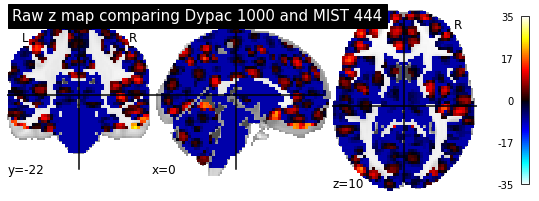

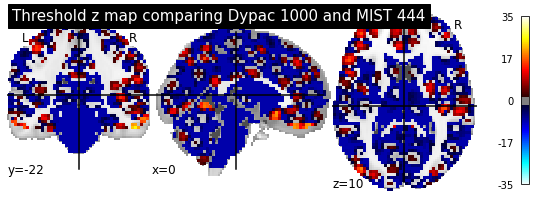

In [10]:
second_level_input = r2maps_mist
second_level_model = SecondLevelModel().fit(
        second_level_input, design_matrix=design_matrix)

zmap_mist = second_level_model.compute_contrast(
    'conditions', output_type='z_score')
plotting.plot_stat_map(zmap_mist, title='Raw z map comparing Dypac 1000 and MIST 444')
plotting.show()

plotting.plot_stat_map(zmap_mist, threshold=2, title='Threshold z map comparing Dypac 1000 and MIST 444')
plotting.show()

FDR, p<0.05 threshold: 2.035


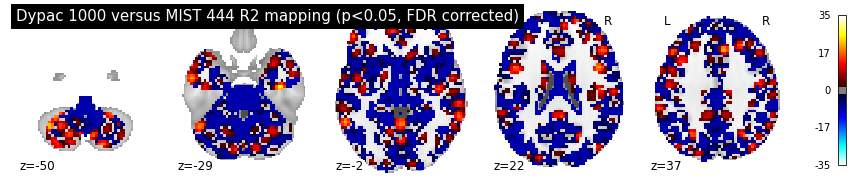

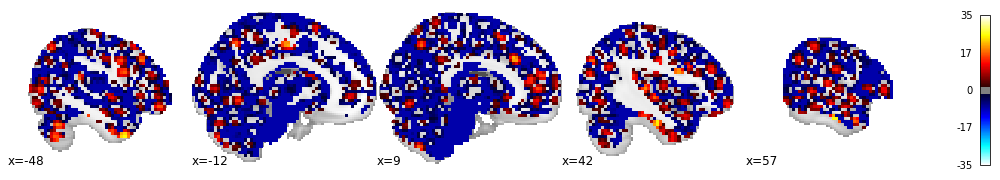

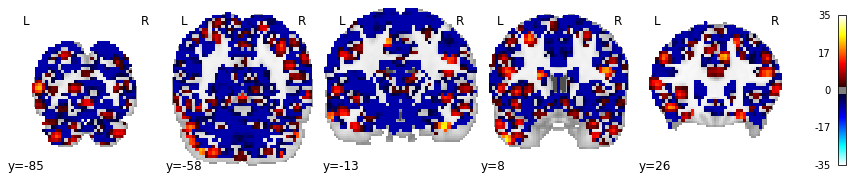

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,24.0,-67.0,-56.0,34.594605,27
1,2,54.0,-19.0,-23.0,27.033185,3213
2,2a,66.0,-19.0,-14.0,19.774847,
3,2b,60.0,-10.0,-11.0,15.897080,
4,2c,57.0,-4.0,-2.0,14.628548,
...,...,...,...,...,...,...
494,395,18.0,-52.0,73.0,2.146117,27
495,396,15.0,-79.0,25.0,2.138241,27
496,397,-18.0,-79.0,31.0,2.137390,27
497,398,-15.0,-52.0,16.0,2.058221,27


In [11]:
_, threshold = map_threshold(zmap_mist, alpha=.05, height_control='fdr')
print('FDR, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(zmap_mist, threshold=threshold, display_mode='z', cut_coords=5,
              title='Dypac 1000 versus MIST 444 R2 mapping (p<0.05, FDR corrected)')
plt.show()

plotting.plot_stat_map(zmap_mist, threshold=threshold, display_mode='x', cut_coords=5)
plt.show()

plotting.plot_stat_map(zmap_mist, threshold=threshold, display_mode='y', cut_coords=5)
plt.show()

get_clusters_table(zmap_mist, stat_threshold=threshold, cluster_threshold=None)

Dypac 1000 versus Smith RSN70
====

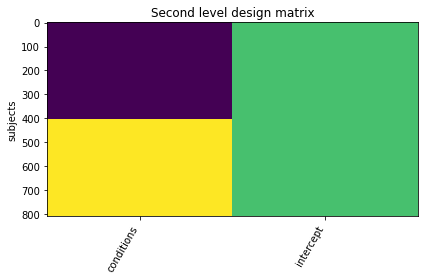

In [12]:
r2maps_smith = []
r2_file_smith = open((os.path.join(path_base,r2_path, 'smith_test.txt')),'r')
for line in r2_file_smith:
    r2maps_smith.append(os.path.join(path_base,r2_path, (line.strip())))
r2_file_smith.close()

behavioral_smith = pd.read_csv('/home/lussier/Projects/embeddings/bigembedding/smith_test.csv', header = 0, sep=',')

file_id = behavioral_smith['FILEID'].values
conditions = behavioral_smith['ATLAS_RECODE'].values

confounds = pd.DataFrame({'subject_label': file_id,
                          'conditions': conditions
                         })

design_matrix = make_second_level_design_matrix(file_id, confounds)

ax = plot_design_matrix(design_matrix)
ax.set_title('Second level design matrix', fontsize=12)
ax.set_ylabel('subjects')
plt.tight_layout()
plt.show()

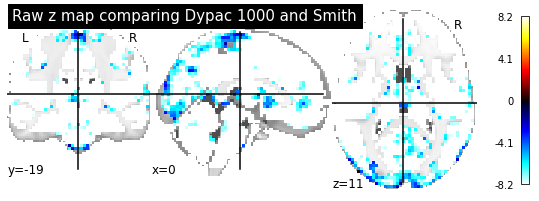

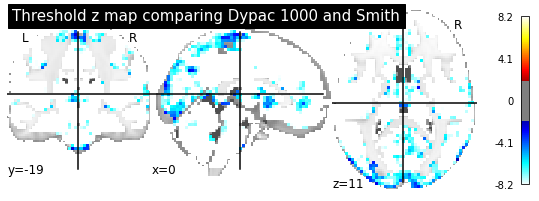

In [13]:
second_level_input = r2maps_smith
second_level_model = SecondLevelModel().fit(
        second_level_input, design_matrix=design_matrix)

zmap_smith = second_level_model.compute_contrast(
    'conditions', output_type='z_score')
plotting.plot_stat_map(zmap_smith, title='Raw z map comparing Dypac 1000 and Smith')
plotting.show()

plotting.plot_stat_map(zmap_smith, threshold=2, title='Threshold z map comparing Dypac 1000 and Smith')
plotting.show()

FDR, p<0.05 threshold: 1.966


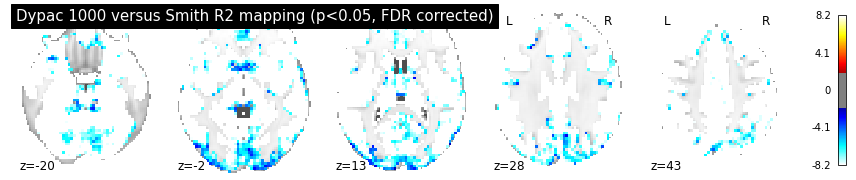

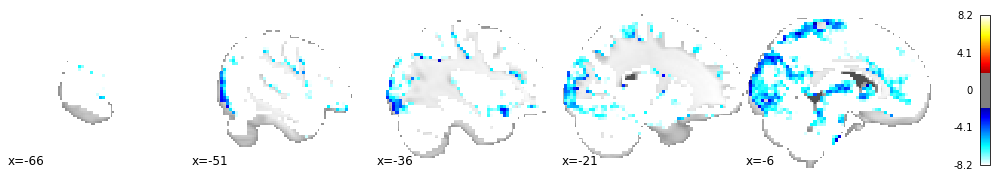

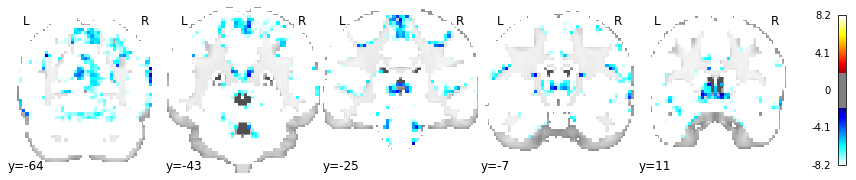

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)


In [14]:
_, threshold = map_threshold(zmap_smith, alpha=.05, height_control='fdr')
print('FDR, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(zmap_smith, threshold=threshold, display_mode='z', cut_coords=5,
              title='Dypac 1000 versus Smith R2 mapping (p<0.05, FDR corrected)')
plt.show()

plotting.plot_stat_map(zmap_smith, threshold=threshold, display_mode='x', cut_coords=5)
plt.show()

plotting.plot_stat_map(zmap_smith, threshold=threshold, display_mode='y', cut_coords=5)
plt.show()

get_clusters_table(zmap_smith, stat_threshold=threshold, cluster_threshold=None)

Dypac 1000 versus Difumo 256
====

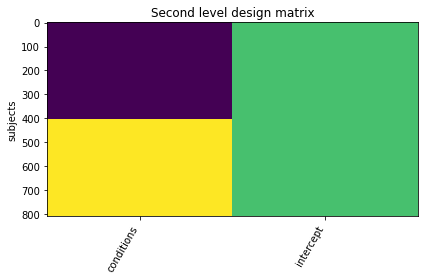

In [15]:
r2maps_difumo256 = []
r2_file_difumo256 = open((os.path.join(path_base,r2_path, 'difumo256_test.txt')),'r')
for line in r2_file_difumo256:
    r2maps_difumo256.append(os.path.join(path_base,r2_path, (line.strip())))
r2_file_difumo256.close()

behavioral_difumo256 = pd.read_csv('/home/lussier/Projects/embeddings/bigembedding/difumo256_test.csv', header = 0, sep=',')

file_id = behavioral_difumo256['FILEID'].values
conditions = behavioral_difumo256['ATLAS_RECODE'].values

confounds = pd.DataFrame({'subject_label': file_id,
                          'conditions': conditions
                         })

design_matrix = make_second_level_design_matrix(file_id, confounds)

ax = plot_design_matrix(design_matrix)
ax.set_title('Second level design matrix', fontsize=12)
ax.set_ylabel('subjects')
plt.tight_layout()
plt.show()

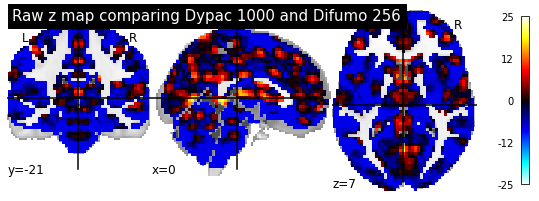

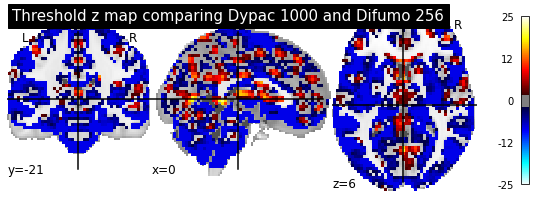

In [16]:
second_level_input = r2maps_difumo256
second_level_model = SecondLevelModel().fit(
        second_level_input, design_matrix=design_matrix)

zmap_difumo256 = second_level_model.compute_contrast(
    'conditions', output_type='z_score')
plotting.plot_stat_map(zmap_difumo256, title='Raw z map comparing Dypac 1000 and Difumo 256')
plotting.show()

plotting.plot_stat_map(zmap_difumo256, threshold=2, title='Threshold z map comparing Dypac 1000 and Difumo 256')
plotting.show()

FDR, p<0.05 threshold: 2.033


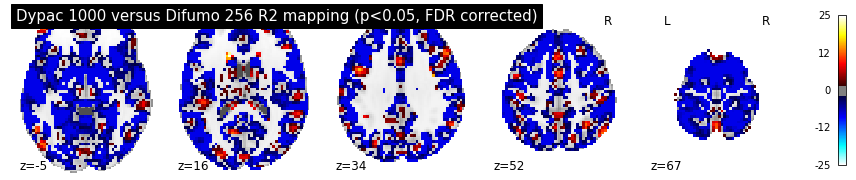

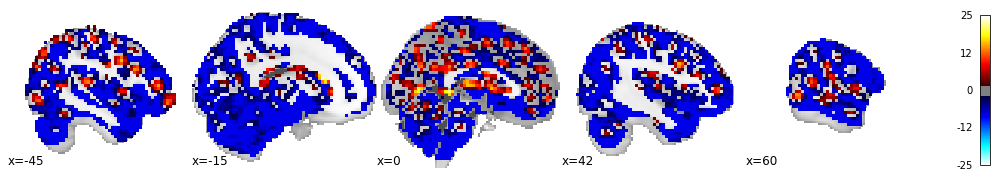

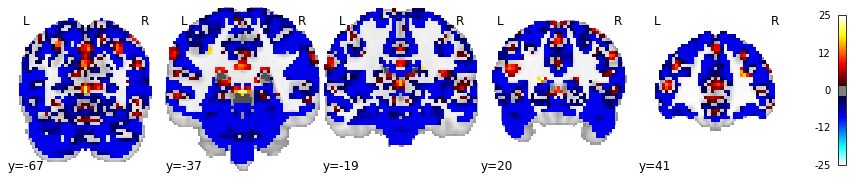

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-15.0,20.0,16.0,24.797740,8343
1,1a,0.0,-19.0,10.0,16.354018,
2,1b,0.0,5.0,7.0,16.194197,
3,1c,0.0,2.0,22.0,14.953432,
4,2,-30.0,-34.0,43.0,21.579761,270
...,...,...,...,...,...,...
421,382,0.0,-61.0,-35.0,2.045082,27
422,383,-36.0,-94.0,-8.0,2.044146,27
423,384,39.0,-16.0,-26.0,2.040442,27
424,385,9.0,-79.0,43.0,2.036820,27


In [17]:
_, threshold = map_threshold(zmap_difumo256, alpha=.05, height_control='fdr')
print('FDR, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(zmap_difumo256, threshold=threshold, display_mode='z', cut_coords=5,
              title='Dypac 1000 versus Difumo 256 R2 mapping (p<0.05, FDR corrected)')
plt.show()

plotting.plot_stat_map(zmap_difumo256, threshold=threshold, display_mode='x', cut_coords=5)
plt.show()

plotting.plot_stat_map(zmap_difumo256, threshold=threshold, display_mode='y', cut_coords=5)
plt.show()

get_clusters_table(zmap_difumo256, stat_threshold=threshold, cluster_threshold=None)

Dypac 1000 versus Difumo 512
====

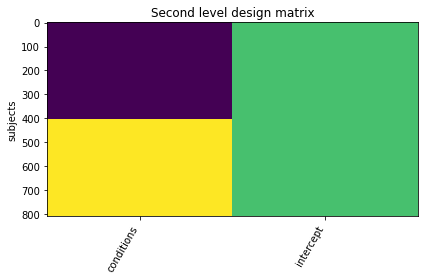

In [18]:
r2maps_difumo512 = []
r2_file_difumo512 = open((os.path.join(path_base,r2_path, 'difumo512_test.txt')),'r')
for line in r2_file_difumo512:
    r2maps_difumo512.append(os.path.join(path_base,r2_path, (line.strip())))
r2_file_difumo512.close()

behavioral_difumo512 = pd.read_csv('/home/lussier/Projects/embeddings/bigembedding/difumo512_test.csv', header = 0, sep=',')

file_id = behavioral_difumo512['FILEID'].values
conditions = behavioral_difumo512['ATLAS_RECODE'].values

confounds = pd.DataFrame({'subject_label': file_id,
                          'conditions': conditions
                         })

design_matrix = make_second_level_design_matrix(file_id, confounds)

ax = plot_design_matrix(design_matrix)
ax.set_title('Second level design matrix', fontsize=12)
ax.set_ylabel('subjects')
plt.tight_layout()
plt.show()

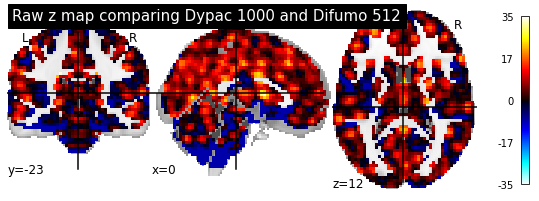

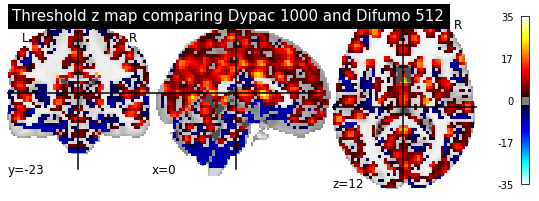

In [19]:
second_level_input = r2maps_difumo512
second_level_model = SecondLevelModel().fit(
        second_level_input, design_matrix=design_matrix)

zmap_difumo512 = second_level_model.compute_contrast(
    'conditions', output_type='z_score')
plotting.plot_stat_map(zmap_difumo512, title='Raw z map comparing Dypac 1000 and Difumo 512')
plotting.show()

plotting.plot_stat_map(zmap_difumo512, threshold=2, title='Threshold z map comparing Dypac 1000 and Difumo 512')
plotting.show()

FDR, p<0.05 threshold: 2.077


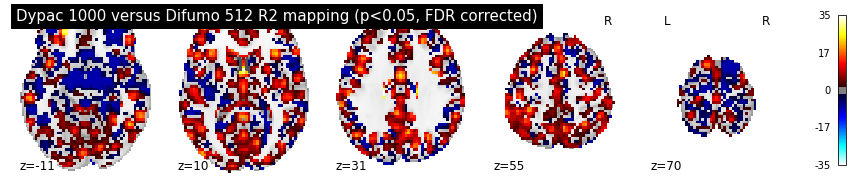

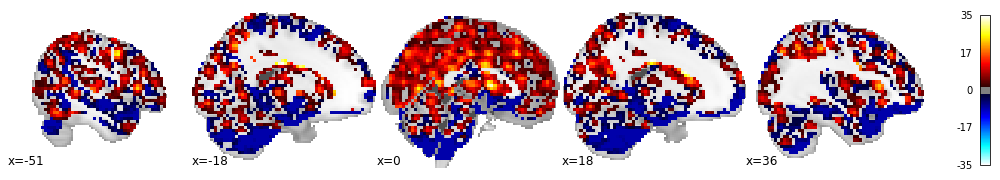

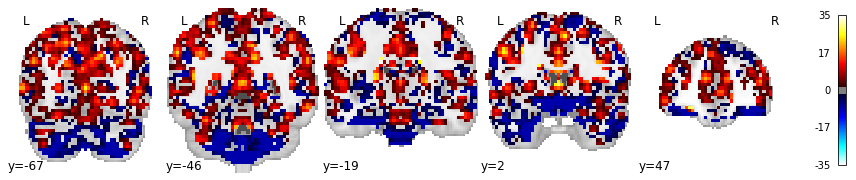

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-18.0,-19.0,31.0,34.845531,626265
1,1a,18.0,-19.0,34.0,34.323755,
2,1b,18.0,14.0,22.0,33.679470,
3,1c,0.0,5.0,10.0,33.036407,
4,2,-21.0,47.0,-11.0,29.972561,1566
...,...,...,...,...,...,...
147,136,51.0,2.0,-8.0,2.105020,27
148,137,24.0,8.0,46.0,2.097706,27
149,138,-15.0,-31.0,61.0,2.095923,27
150,139,6.0,8.0,-11.0,2.079615,27


In [20]:
_, threshold = map_threshold(zmap_difumo512, alpha=.05, height_control='fdr')
print('FDR, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(zmap_difumo512, threshold=threshold, display_mode='z', cut_coords=5,
              title='Dypac 1000 versus Difumo 512 R2 mapping (p<0.05, FDR corrected)')
plt.show()

plotting.plot_stat_map(zmap_difumo512, threshold=threshold, display_mode='x', cut_coords=5)
plt.show()

plotting.plot_stat_map(zmap_difumo512, threshold=threshold, display_mode='y', cut_coords=5)
plt.show()

get_clusters_table(zmap_difumo512, stat_threshold=threshold, cluster_threshold=None)

Dypac 1000 versus Difumo 1024
====

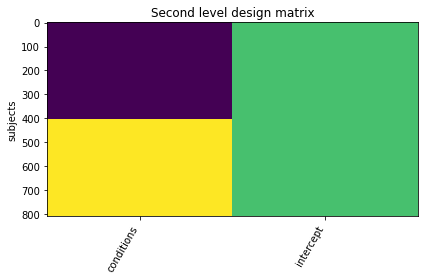

In [21]:
r2maps_difumo1024 = []
r2_file_difumo1024 = open((os.path.join(path_base,r2_path, 'difumo1024_test.txt')),'r')
for line in r2_file_difumo1024:
    r2maps_difumo1024.append(os.path.join(path_base,r2_path, (line.strip())))
r2_file_difumo1024.close()

behavioral_difumo1024 = pd.read_csv('/home/lussier/Projects/embeddings/bigembedding/difumo1024_test.csv', header = 0, sep=',')

file_id = behavioral_difumo1024['FILEID'].values
conditions = behavioral_difumo1024['ATLAS_RECODE'].values

confounds = pd.DataFrame({'subject_label': file_id,
                          'conditions': conditions
                         })

design_matrix = make_second_level_design_matrix(file_id, confounds)

ax = plot_design_matrix(design_matrix)
ax.set_title('Second level design matrix', fontsize=12)
ax.set_ylabel('subjects')
plt.tight_layout()
plt.show()

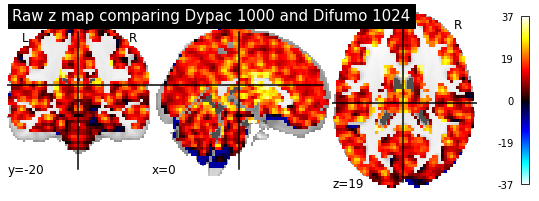

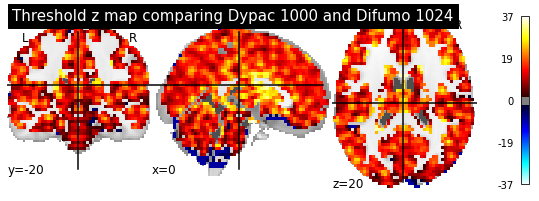

In [22]:
second_level_input = r2maps_difumo1024
second_level_model = SecondLevelModel().fit(
        second_level_input, design_matrix=design_matrix)

zmap_difumo1024 = second_level_model.compute_contrast(
    'conditions', output_type='z_score')
plotting.plot_stat_map(zmap_difumo1024, title='Raw z map comparing Dypac 1000 and Difumo 1024')
plotting.show()

plotting.plot_stat_map(zmap_difumo1024, threshold=2, title='Threshold z map comparing Dypac 1000 and Difumo 1024')
plotting.show()

FDR, p<0.05 threshold: 1.983


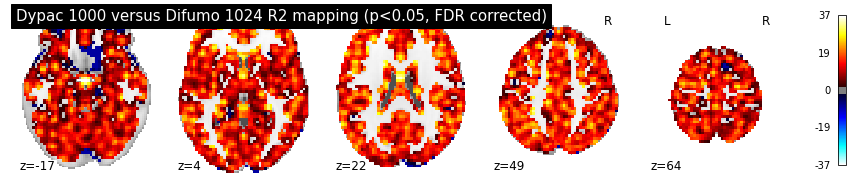

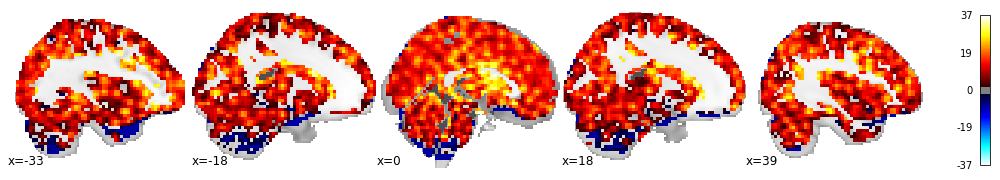

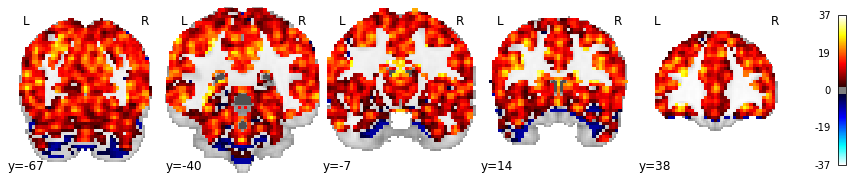

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,-9.0,-7.0,31.0,37.047096,1262979
1,1a,21.0,-25.0,28.0,37.047096,
2,1b,0.0,-7.0,-17.0,37.047096,
3,1c,-21.0,-25.0,28.0,37.047096,
4,2,21.0,-82.0,-47.0,9.138249,432
5,3,18.0,-43.0,-47.0,8.640831,378
6,4,-12.0,-34.0,19.0,5.820220,27
7,5,12.0,-34.0,19.0,5.323742,27
8,6,-27.0,-70.0,-53.0,4.557768,216
9,7,-18.0,-22.0,-32.0,3.382114,27


In [23]:
_, threshold = map_threshold(zmap_difumo1024, alpha=.05, height_control='fdr')
print('FDR, p<0.05 threshold: %.3f' % threshold)
plotting.plot_stat_map(zmap_difumo1024, threshold=threshold, display_mode='z', cut_coords=5,
              title='Dypac 1000 versus Difumo 1024 R2 mapping (p<0.05, FDR corrected)')
plt.show()

plotting.plot_stat_map(zmap_difumo1024, threshold=threshold, display_mode='x', cut_coords=5)
plt.show()

plotting.plot_stat_map(zmap_difumo1024, threshold=threshold, display_mode='y', cut_coords=5)
plt.show()

get_clusters_table(zmap_difumo1024, stat_threshold=threshold, cluster_threshold=None)